In [1]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
sn.set(font_scale=2)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
linedf = pd.read_csv("Data/lines.csv", sep=";")

In [3]:
def occupancy(path):
    df = pd.read_csv(path)

    listofmeans = []
    for index, row in df.iterrows():
        listoflists = [literal_eval(row['occupancy1']), literal_eval(row['occupancy2']), 
                literal_eval(row['occupancy3']), literal_eval(row['occupancy4']), literal_eval(row['occupancy5']), 
                literal_eval(row['occupancy6']), literal_eval(row['occupancy7']), literal_eval(row['occupancy8']),
                literal_eval(row['occupancy9']), literal_eval(row['occupancy10'])]

        singelist = map(sum, map(lambda l: map(float, l), zip(*listoflists)))
        averagelist = [x / 10 for x in singelist]

        if row['line'].endswith('1'):
            averagelist = averagelist[::-1]

        listofmeans.append(averagelist)

    df['mean'] = listofmeans
    df['linename'] = df['line'].apply(lambda x: x[:-2])
    df = df.merge(linedf, left_on = "linename", right_on = "Line")
    df = df[['departure','line', 'mean', 'Route1']]
    df['Route1'] = df['Route1'].apply(lambda x: literal_eval(x))
    return df

In [4]:
example = occupancy("../../Results/Sc1Week/8/vehicles8.csv")
example[example['line'] == 'metro53_0']

,departure,line,mean,Route1
52,08:03:00,metro53_0,"[26.7, 105.1, 105.1, 116.6, 171.1, 237.8, 234....","[Gaasperplas, Kraaienneststation, Station Ganz..."
54,08:13:00,metro53_0,"[27.7, 110.8, 110.8, 124.8, 182.6, 217.5, 159....","[Gaasperplas, Kraaienneststation, Station Ganz..."
56,08:23:00,metro53_0,"[27.8, 114.7, 114.7, 125.9, 180.5, 213.3, 248....","[Gaasperplas, Kraaienneststation, Station Ganz..."
58,08:33:00,metro53_0,"[26.3, 110.5, 110.5, 122.8, 182.0, 215.5, 276....","[Gaasperplas, Kraaienneststation, Station Ganz..."
60,08:43:00,metro53_0,"[28.6, 115.3, 115.3, 129.2, 186.9, 221.0, 263....","[Gaasperplas, Kraaienneststation, Station Ganz..."
62,08:53:00,metro53_0,"[27.7, 118.2, 118.2, 129.6, 190.5]","[Gaasperplas, Kraaienneststation, Station Ganz..."


In [5]:
def plot_occupancy0(line, time, hour):
    scenario1 = occupancy("../../Results/Sc1Week/" + hour + "/vehicles" + hour + ".csv")
    scenario2 = occupancy("../../Results/Sc2Week/" + hour + "/vehicles" + hour + ".csv")
    
    scenario1 = scenario1[(scenario1['line'] == line) & (scenario1['departure'] == time)]
    scenario2 = scenario2[(scenario2['line'] == line) & (scenario2['departure'] == time)]
    
    length = len(list(scenario1['mean'])[0])
    
    route = list(scenario1['Route1'])[0]
    df = pd.DataFrame({'Scenario 1': list(scenario1['mean'])[0], 'Scenario 2': list(scenario2['mean'])[0]}, 
                      index=route[1:length + 1])
    
    plot = df.plot(style='.-', figsize = [20,8], colors = sn.color_palette("Set2", 2))
    plot.set_xticklabels(route[1:length + 1], rotation=90)
    plot.set(xticks=range(0, length + 1), xticklabels=route[1:length + 1])
    return plot

In [6]:
def plot_occupancy1(line, time, hour):
    scenario1 = occupancy("../../Results/Sc1Week/" + hour + "/vehicles" + hour + ".csv")
    scenario2 = occupancy("../../Results/Sc2Week/" + hour + "/vehicles" + hour + ".csv")
    
    scenario1 = scenario1[(scenario1['line'] == line) & (scenario1['departure'] == time)]
    scenario2 = scenario2[(scenario2['line'] == line) & (scenario2['departure'] == time)]
    
    length = len(list(scenario1['mean'])[0])
    
    route = list(scenario1['Route1'])[0]
    df = pd.DataFrame({'Scenario 1': list(scenario1['mean'])[0][::-1], 'Scenario 2': list(scenario2['mean'])[0][::-1]}, 
                      index=route[::-1][1:length + 1])
    
    plot = df.plot(style='.-', figsize = [20,8], colors = sn.color_palette("Set2", 2))
    plot.set_xticklabels(route[::-1][1:length + 1], rotation=90)
    plot.set(xticks=range(0, length + 1), xticklabels=route[::-1][1:length + 1])
    return plot

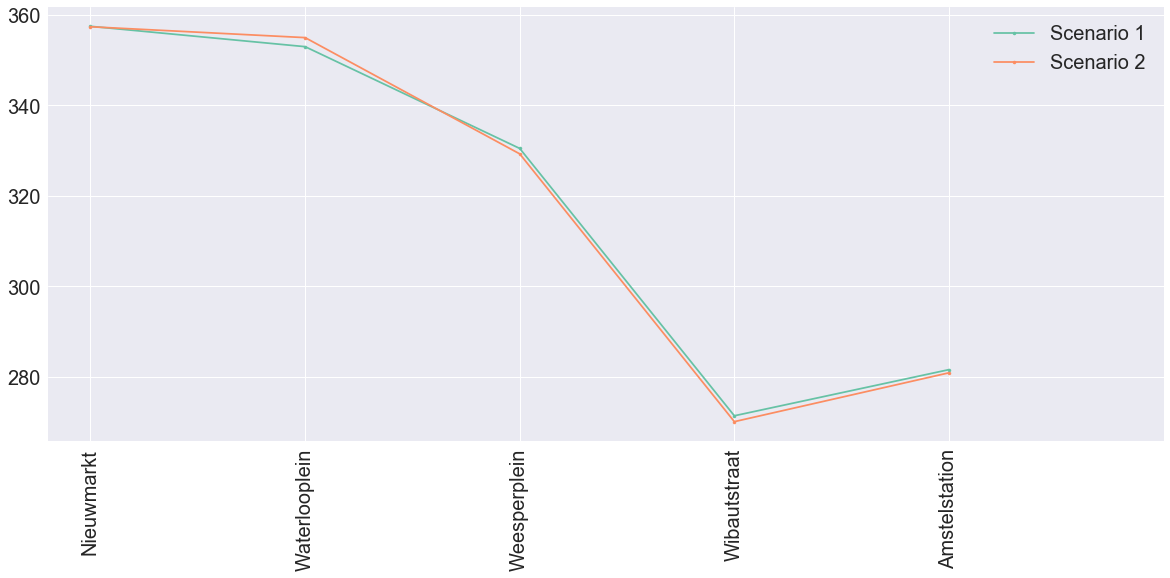

In [22]:
plot_occupancy1('metro53_1', '08:53:00', '8')